No. of dataset examples:  59995
No. of Labels examples:  59995
No. of Training train_dataset examples:  59995
No. of Training train_loader examples:  938
Images generated and saved in 'images' folder. 0
Predicted digit: 5
Images generated and saved in 'images' folder. 1
Predicted digit: 0
Images generated and saved in 'images' folder. 2
Predicted digit: 4
Images generated and saved in 'images' folder. 3
Predicted digit: 1
Images generated and saved in 'images' folder. 4
Predicted digit: 9
Images generated and saved in 'images' folder. 5
Predicted digit: 2
Images generated and saved in 'images' folder. 6
Predicted digit: 1
Images generated and saved in 'images' folder. 7
Predicted digit: 3
Images generated and saved in 'images' folder. 8
Predicted digit: 1
Images generated and saved in 'images' folder. 9
Predicted digit: 4


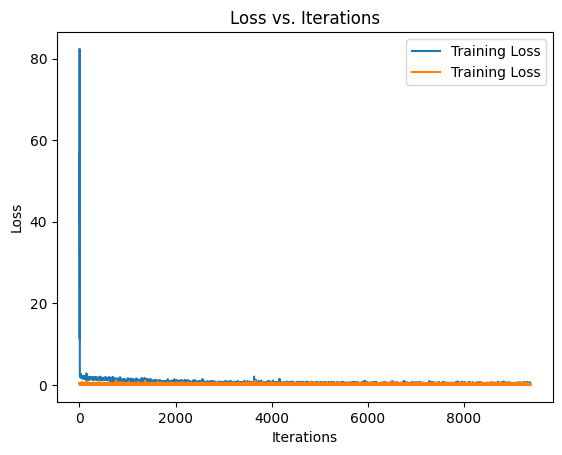

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (28, 28).

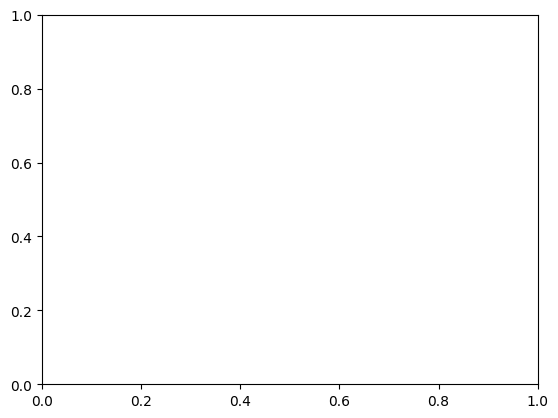

In [35]:
import torch as tch 
import torchvision.datasets as dt
import torchvision.transforms as trans
from torch.utils.data import DataLoader, TensorDataset 
import torch.optim as optim 
import torch.nn as nn
import matplotlib.pyplot as plt
from time import time 
import numpy as np 
from PIL import Image
import os 

# The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems 
# train = dt.MNIST(root="./datasets", train=True, transform=trans.ToTensor(), download=True) 
# test = dt.MNIST(root="./datasets", train=False, transform=trans.ToTensor(), download=True)

# Specify the full file path. 
# Use double backslashes (\\) in the file path on Windows, as a single backslash is an escape character in Python strings.
dataset_path = "C:\\GPYlearn\\NN-Task\\dataset.npy" 
label_path = "C:\\GPYlearn\\NN-Task\\labels.npy"
# Load the dataset and labels from the .npy files
dataset = np.load(dataset_path) 
labels  = np.load(label_path)

# Convert the dataset and labels to PyTo 
dataset = tch.Tensor(dataset)
labels  = tch.LongTensor(labels)  

print("No. of dataset examples: ",len(dataset))
print("No. of Labels examples: ",len(labels)) 

# Define a simple feedforward neural network using torch.nn.Module. This network consists of three fully connected (linear) layers.

## Input Layer (self.fc1): This layer has 784 input units, which correspond to the 28x28 pixel images in the MNIST dataset 
# and 128 hidden units in this layer , choice is arbitrary and can be changed  but is a good starting point. 
## Hidden Layer (self.fc2): This layer has 128 input units, which is the output size of the previous layer, and it has 64 hidden units 
# It's common to reduce the number of units in hidden layers as you move deeper into the network to reduce model complexity and prevent overfitting. 
## Output layer (self.fc3) : ....     Inputs units affects the performance of  neural network following are consideration 
#  Model Complexity: More hidden units can capture more complex patterns in the data but may also lead to overfitting. 
#   Fewer hidden units can make the model simpler but might not capture complex patterns. 
#  Computational Resources: More hidden units require more computational resources, both during training and inference. 
# If you have limited resources, you may want to keep the network simpler.
# Empirical Testing: The best choice for the number of hidden units often comes from empirical testing. 
# You can try different values, train the model, and evaluate its performance on a validation dataset to see which value works best for your specific problem.
# perimentation and tuning of hyperparameters, including the number of hidden units, are essential to find the best configuration for your specific task.

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Input: 28x28 image = 784 features
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)   # Output: 10 classes (digits 0-9)

# the forward method defines the forward pass through the neural network, specifying how input data is processed through each layer of the network,
# including linear transformations and activation functions. This method outlines the sequence of operations that transform 
# the input data into meaningful output, which is crucial for both training and inference. 
# The torch.relu function is the rectified linear unit activation function.
# It operates element-wise on a tensor and returns a new tensor of the same shape. 
    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the input . In the first line of the forward method, the input x is reshaped using the .view method. The -1 in the first dimension allows PyTorch to automatically calculate the size of that dimension based on the total number of elements in the tensor. In this specific case, it flattens the input tensor x to a shape of (batch_size, 784). This is typically done when the input to the neural network is a multi-dimensional tensor (e.g., images) that needs to be converted into a 1D vector to be processed by fully connected layers.
        x = tch.relu(self.fc1(x)) # After flattening the input, it is passed through the first fully connected (linear) layer self.fc1. The result of this operation is then passed through the ReLU activation function using torch.relu. This introduces non-linearity into the network. The output x now represents the activations of the first hidden layer (fc1) with ReLU activation applied.
        x = tch.relu(self.fc2(x)) # Next, the activations from the previous layer are passed through the second fully connected layer self.fc2, and the ReLU activation is applied again. This step introduces non-linearity and computes the activations of the second hidden layer.
        x = self.fc3(x)   # Finally, the activations from the second hidden layer are passed through the third fully connected layer self.fc3. This layer doesn't have an explicit activation function applied to it, which means it will produce raw output values. In the case of MNIST digit recognition, this layer is responsible for producing the network's output logits, which can be used to predict the probabilities of each digit.
        return x  # The output of the last fully connected layer (self.fc3) is returned from the forward method. These values are typically used for further processing, such as computing probabilities for classification tasks (e.g., using softmax), or for calculating loss during training.



# Create a DataLoader for training . A batch size of 64 is often chosen because it strikes a good balance between computational efficiency 
#  and training time. choosing the right batch size can involve some trial and error and is task-dependent
batch_size = 64
train_dataset = TensorDataset(dataset, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

print("No. of Training train_dataset examples: ",len(train_dataset)) 
print("No. of Training train_loader examples: ",len(train_loader)) 

## Instantiate the model and define the loss and optimizer.  
# Involved in setting up and configuring .  1) the neural network model.The neural network architecture you want to train. 
# 2) the loss function.  The CrossEntropyLoss is a loss function used for classification tasks. It computes the cross-entropy (logarithmic loss) between the predicted class probabilities and the true class labels.
# 3) and the optimization algorithm. It's responsible for updating the model's weights during the training process 
model = SimpleNN()   
criterion = nn.CrossEntropyLoss()  #The loss function that quantifies the error between predicted and true labels.
optimizer = optim.SGD(model.parameters(), lr=0.01) # The optimization algorithm that updates the model's parameters to minimize the loss. 
# In this case, it's Stochastic Gradient Descent (SGD) with a learning rate of 0.01.

# Lists to store loss values and iteration numbers
losses = []
iterations = []      
  
## Training loop for neural network.  along with # Lists to store loss values and iteration numbers
# This loop is responsible for iteratively training the model on the training data over a specified number of epochs. An epoch is when all the training data
# is used at once and is defined as the total number of iterations of all the training data in one cycle for training the machine learning model.

num_epochs = 10   # the training loop will go through the entire training dataset 10 times. 
total_iterations = 0 
for epoch in range(num_epochs):       # This is the outer loop that iterates over the specified number of epochs. Each epoch involves processing the entire training dataset.
     for iteration, (inputs, targets) in enumerate(train_loader, start=1):  # This is an inner loop that iterates through mini-batches of data.
    # The train_loader is an object created using PyTorch's DataLoader, and it divides the training dataset into mini-batches, allowing you to process smaller chunks of data at a time.
        optimizer.zero_grad() # This line initializes the gradients of the model's parameters to zero. Gradients accumulate as you perform forward and backward passes
    # through the network. It's essential to reset the gradients to zero at the start of each mini-batch because you don't want gradients from previous mini-batches to interfere with the current one
        outputs = model(inputs) # This line feeds the mini-batch of input data (inputs) through the neural network model (model). The model computes the predictions for the given input data.
        loss = criterion(outputs, targets) # The line calculates the loss for the current mini-batch. It uses the loss function (criterion). 
    #  typically a measure of the discrepancy between the model's predictions (outputs) and the true target values (targets).   This loss is what the optimizer tries to minimize during training.   
        loss.backward() # Performs backpropagation through the network to compute the gradients of the model's parameters with respect to the loss. 
    # The gradients represent the sensitivity of the loss to changes in the model's parameters. Backpropagation is a crucial step in training neural networks as it helps in updating the model's weights to minimize the loss    
        optimizer.step() # The optimizer adjusts the weights and biases in a direction that reduces the loss. The learning rate specified during optimizer setup (lr=0.01) determines the size of these parameter updates. 
    # Record the loss and iteration number
        losses.append(loss.item())
        iterations.append(total_iterations)
        total_iterations += 1

# Plot the loss-iteration graph
plt.plot(iterations, losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.legend() 

# The training loop continues to execute for the specified number of epochs, with each iteration updating the model's parameters and 
# making it gradually learn to fit the training data. After training, the model should have better predictive capabilities 
# and can be evaluated on a separate validation or test dataset to assess its performance.


## Load and process an image for prediction.   loading and preprocessing an image for prediction using a trained neural network.
# It applies a series of transformations to the image before it can be fed into the neural network.

# Create a folder to store the generated images
if not os.path.exists('images'):
    os.mkdir('images')


# Generate images and make predictions for 10 generated images
model.eval()
with tch.no_grad():
    for i in range(10):  # Generate 10 images and predictions
        input_data = dataset[i:i + 1]  # Select a data point from the loaded dataset
        prediction = model(input_data)
        predicted_class = tch.argmax(prediction).item()

        # Convert the data tensor to an image and save it
        data_image = input_data.view(28, 28).cpu().numpy() * 255
        data_image = Image.fromarray(data_image.astype(np.uint8))
        data_image.save(f'images/predicted_{predicted_class}.png')
        print("Images generated and saved in 'images' folder.", i)
        print("Predicted digit:", predicted_class)

## Plot a loss-iteration graph, you can use Python libraries like Matplotlib. 
# Record the loss values during training, and then you can use Matplotlib to visualize the loss as a function of the training iterations

# Lists to store loss values and iteration numbers
losses = []
iterations = []

# Training loop with loss recording
num_epochs = 10
total_iterations = 0

for epoch in range(num_epochs):
    for iteration, (inputs, targets) in enumerate(train_loader, start=1):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        # Record the loss and iteration number
        losses.append(loss.item())
        iterations.append(total_iterations)
        total_iterations += 1

# Plot the loss-iteration graph
plt.plot(iterations, losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.legend()
plt.show() 

# Display the probability distribution for a sample image
sample_image = dataset[0:1]
with tch.no_grad(): 
 probs = tch.softmax( (sample_image), dim=1).squeeze().cpu().detach().numpy()  

# Takes the output of the neural network model, applies the softmax function to obtain class probabilities, and then processes the result to ensure it's a 1D NumPy array that can be used for visualization or further analysis. 
# This allows  to see the model's confidence in predicting each class for the given sample image. 
# The softmax function is used to convert raw model outputs into a probability distribution over classes. It exponentiates and normalizes the model's output so that it represents the probability of each class.
#  squeeze() function  in the softmax output tensor is typically a 2D tensor, and squeeze() is used to convert it to a 1D tensor.
# cpu() function moves the tensor to the CPU if it's not already there. It's necessary for the next step, which is converting the tensor to a NumPy array.
# detach() function is used to create a new tensor that shares the same data but doesn't require gradients. This is important because you generally don't need gradients when converting the tensor to a NumPy array for visualization.
# numpy() function is used to convert the detached tensor into a NumPy array  


# Plot the probability distribution graph
plt.figure()
plt.bar(range(10), probs)
plt.xlabel('Digit Class')
plt.ylabel('Probability')
plt.title('Probability Distribution for Sample Image')
plt.xticks(range(10))
plt.show() 
